# **Problem Statement**

In the highly competitive telecom industry, customers can easily switch between service providers, making retention a critical business challenge. Customer expectations are high, often shaped by individual service experiences—and even brief service disruptions can significantly impact satisfaction. Given the high cost of customer acquisition, retaining existing customers is far more cost-effective than acquiring new ones.

Customer churn refers to subscribers who cancel or fail to renew their services. A high churn rate directly impacts revenue and long-term growth. By analyzing historical customer data and identifying churn drivers, telecom companies can proactively design targeted retention strategies, improve service quality, and enhance overall customer experience.

# **Objective**

The goal of this project is to predict customer churn by leveraging both numerical and categorical customer attributes. This is formulated as a binary classification problem on an imbalanced dataset, where the objective is to accurately identify customers who are at high risk of churning, enabling timely and data driven intervention strategies.

# Data Preprocessing

## **Dataset Attributes**

**customerID** : Customer ID

**gender** : Whether the customer is a male or a female

**SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)

**Partner** : Whether the customer has a partner or not (Yes, No)

**Dependents** : Whether the customer has dependents or not (Yes, No)

**tenure** : Number of months the customer has stayed with the company

**PhoneService** : Whether the customer has a phone service or not (Yes, No)

**MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)

**InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)

**DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract** : The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges** : The amount charged to the customer monthly

**TotalCharges** : The total amount charged to the customer

**Churn** : Whether the customer churned or not (Yes or No)

In [23]:
# ! pip install imbalanced-learn
# ! pip install catboost

In [41]:
#imports
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = '/content/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
def summarize(df):
    summary_df = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Unique Values": df.nunique().values,
        "First Value": df.iloc[0].values if len(df) > 0 else None,
        "Second Value": df.iloc[1].values if len(df) > 1 else None,
        "Third Value": df.iloc[2].values if len(df) > 2 else None
    })
    return summary_df

summarize(df)

,Column,Data Type,Missing Values,Unique Values,First Value,Second Value,Third Value
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK
1,gender,object,0,2,Female,Male,Male
2,SeniorCitizen,int64,0,2,0,0,0
3,Partner,object,0,2,Yes,No,No
4,Dependents,object,0,2,No,No,No
5,tenure,int64,0,73,1,34,2
6,PhoneService,object,0,2,No,Yes,Yes
7,MultipleLines,object,0,3,No phone service,No,No
8,InternetService,object,0,3,DSL,DSL,DSL
9,OnlineSecurity,object,0,3,No,Yes,Yes


* The dataset doesn't have any missing values
* tenure, MonthlyCharges and TotalCharges features are numerical, all other features are categorical.
* Categorical variables must be transformed into numerical features using appropriate encoding techniques prior to modeling.
* TotalCharges represents numeric values, but it is stored as a string and must be cast to float before modeling.
> **TotalCharges = MonthlyCharges × tenure**


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.loc[df['TotalCharges'].isnull(), 'TotalCharges'] = (df['MonthlyCharges'] * df['tenure'])

- Filled missing TotalCharges values only where they
were null by recomputing them as MonthlyCharges × tenure, which preserves billing logic instead of using arbitrary imputation.

## Label Encode Categorical Features

In [7]:
# Create a deep copy of the dataset
encoded_df = df.copy(deep=True)
encoded_df.drop(columns=['customerID'], inplace=True)

# Identify categorical (non-numeric) features
categorical_features = [col for col in encoded_df.columns if col not in encoded_df.describe().columns]

label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le

    print(
        f"Label Encoding Transformation\n"
        f"{col} : {encoded_df[col].unique()} = "
        f"{le.inverse_transform(encoded_df[col].unique())}"
    )

Label Encoding Transformation
gender : [0 1] = ['Female' 'Male']
Label Encoding Transformation
Partner : [1 0] = ['Yes' 'No']
Label Encoding Transformation
Dependents : [0 1] = ['No' 'Yes']
Label Encoding Transformation
PhoneService : [0 1] = ['No' 'Yes']
Label Encoding Transformation
MultipleLines : [1 0 2] = ['No phone service' 'No' 'Yes']
Label Encoding Transformation
InternetService : [0 1 2] = ['DSL' 'Fiber optic' 'No']
Label Encoding Transformation
OnlineSecurity : [0 2 1] = ['No' 'Yes' 'No internet service']
Label Encoding Transformation
OnlineBackup : [2 0 1] = ['Yes' 'No' 'No internet service']
Label Encoding Transformation
DeviceProtection : [0 2 1] = ['No' 'Yes' 'No internet service']
Label Encoding Transformation
TechSupport : [0 2 1] = ['No' 'Yes' 'No internet service']
Label Encoding Transformation
StreamingTV : [0 2 1] = ['No' 'Yes' 'No internet service']
Label Encoding Transformation
StreamingMovies : [0 2 1] = ['No' 'Yes' 'No internet service']
Label Encoding Transform

In [8]:
encoded_df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# Exploratory Data Analysis


In [9]:
encoded_df['customerID'] = df['customerID']
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PaperlessBilling', 'PhoneService', 'Contract', 'StreamingMovies',
                'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity',
                'InternetService', 'MultipleLines', 'DeviceProtection', 'PaymentMethod']
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

## Churn Distribution¶


In [10]:
# Churn percentage
churn_pct = encoded_df['Churn'].value_counts(normalize=True).mul(100).round(2)
print("CUSTOMERS % CHURN:")
print(churn_pct)

# Churn count
churn_counts = encoded_df['Churn'].value_counts()

# Bar plot
fig = go.Figure(data=[go.Bar(x=churn_counts.index, y=churn_counts.values, marker_color=['#6baed6', '#fb6a4a'])])
fig.update_layout(title='Churn (Target) Distribution', xaxis_title='Customer Churn?', yaxis_title='Count')
iplot(fig)


CUSTOMERS % CHURN:
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


> Approximately 26.5% of the customers in the dataset have churned, indicating a moderately imbalanced target distribution. To better understand the behavioral differences between customer segments, the dataset is segmented into churned and non-churned customer groups for comparative analysis.

Additionally, Monthly Charges are to be examined across both segments to identify potential pricing-related patterns. The underlying hypothesis is that churned customers exhibit a higher average monthly charge compared to non-churned customers, which may suggest increased price sensitivity or perceived value mismatch.

## Distribution of each feature by Churn Status

In [11]:
def plot_distribution(df, feature):
    churned = df[df['Churn'] == 1][feature]
    non_churned = df[df['Churn'] == 0][feature]

    fig = go.Figure()
    fig.add_trace(go.Histogram(x=non_churned, name='Non-Churn', opacity=0.7, histnorm='probability density', marker_color='#6baed6'))
    fig.add_trace(go.Histogram(x=churned, name='Churn', opacity=0.7, histnorm='probability density', marker_color='#fb6a4a'))
    fig.update_layout(title=f'Distribution of {feature} by Churn Status', xaxis_title=feature, yaxis_title='Density', barmode='overlay')
    iplot(fig)

### Distribution of MonthlyCharges by Churn Status

In [12]:
plot_distribution(encoded_df, 'MonthlyCharges')


> The overlaid distributions reveal a shift toward higher Monthly Charges among churned customers, indicating potential price sensitivity.

### Distribution of tenure by Churn Status

In [13]:
plot_distribution(encoded_df, 'tenure')

> Tenure and churn exhibit an inverse relationship: customers with longer tenure show lower churn rates, while customers with shorter tenure are more likely to churn.

### Churn Percentage Across Categorical Features

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_categorical_churn_percentage_grid(df,categorical_columns):
    """
    Plots churn percentage by categorical features in a grid layout.
    """
    sns.set(style="whitegrid")

    # Work on a copy to avoid side effects
    data = df.copy()

    data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        churn_pct = (data.groupby(col)['Churn'].mean().mul(100).reset_index())

        sns.barplot(data=churn_pct, x=col, y='Churn', color='#fb6a4a', ax=axes[i])

        axes[i].set_title(f'Churn % vs {col}', fontsize=15)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Churn Percentage (%)')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()



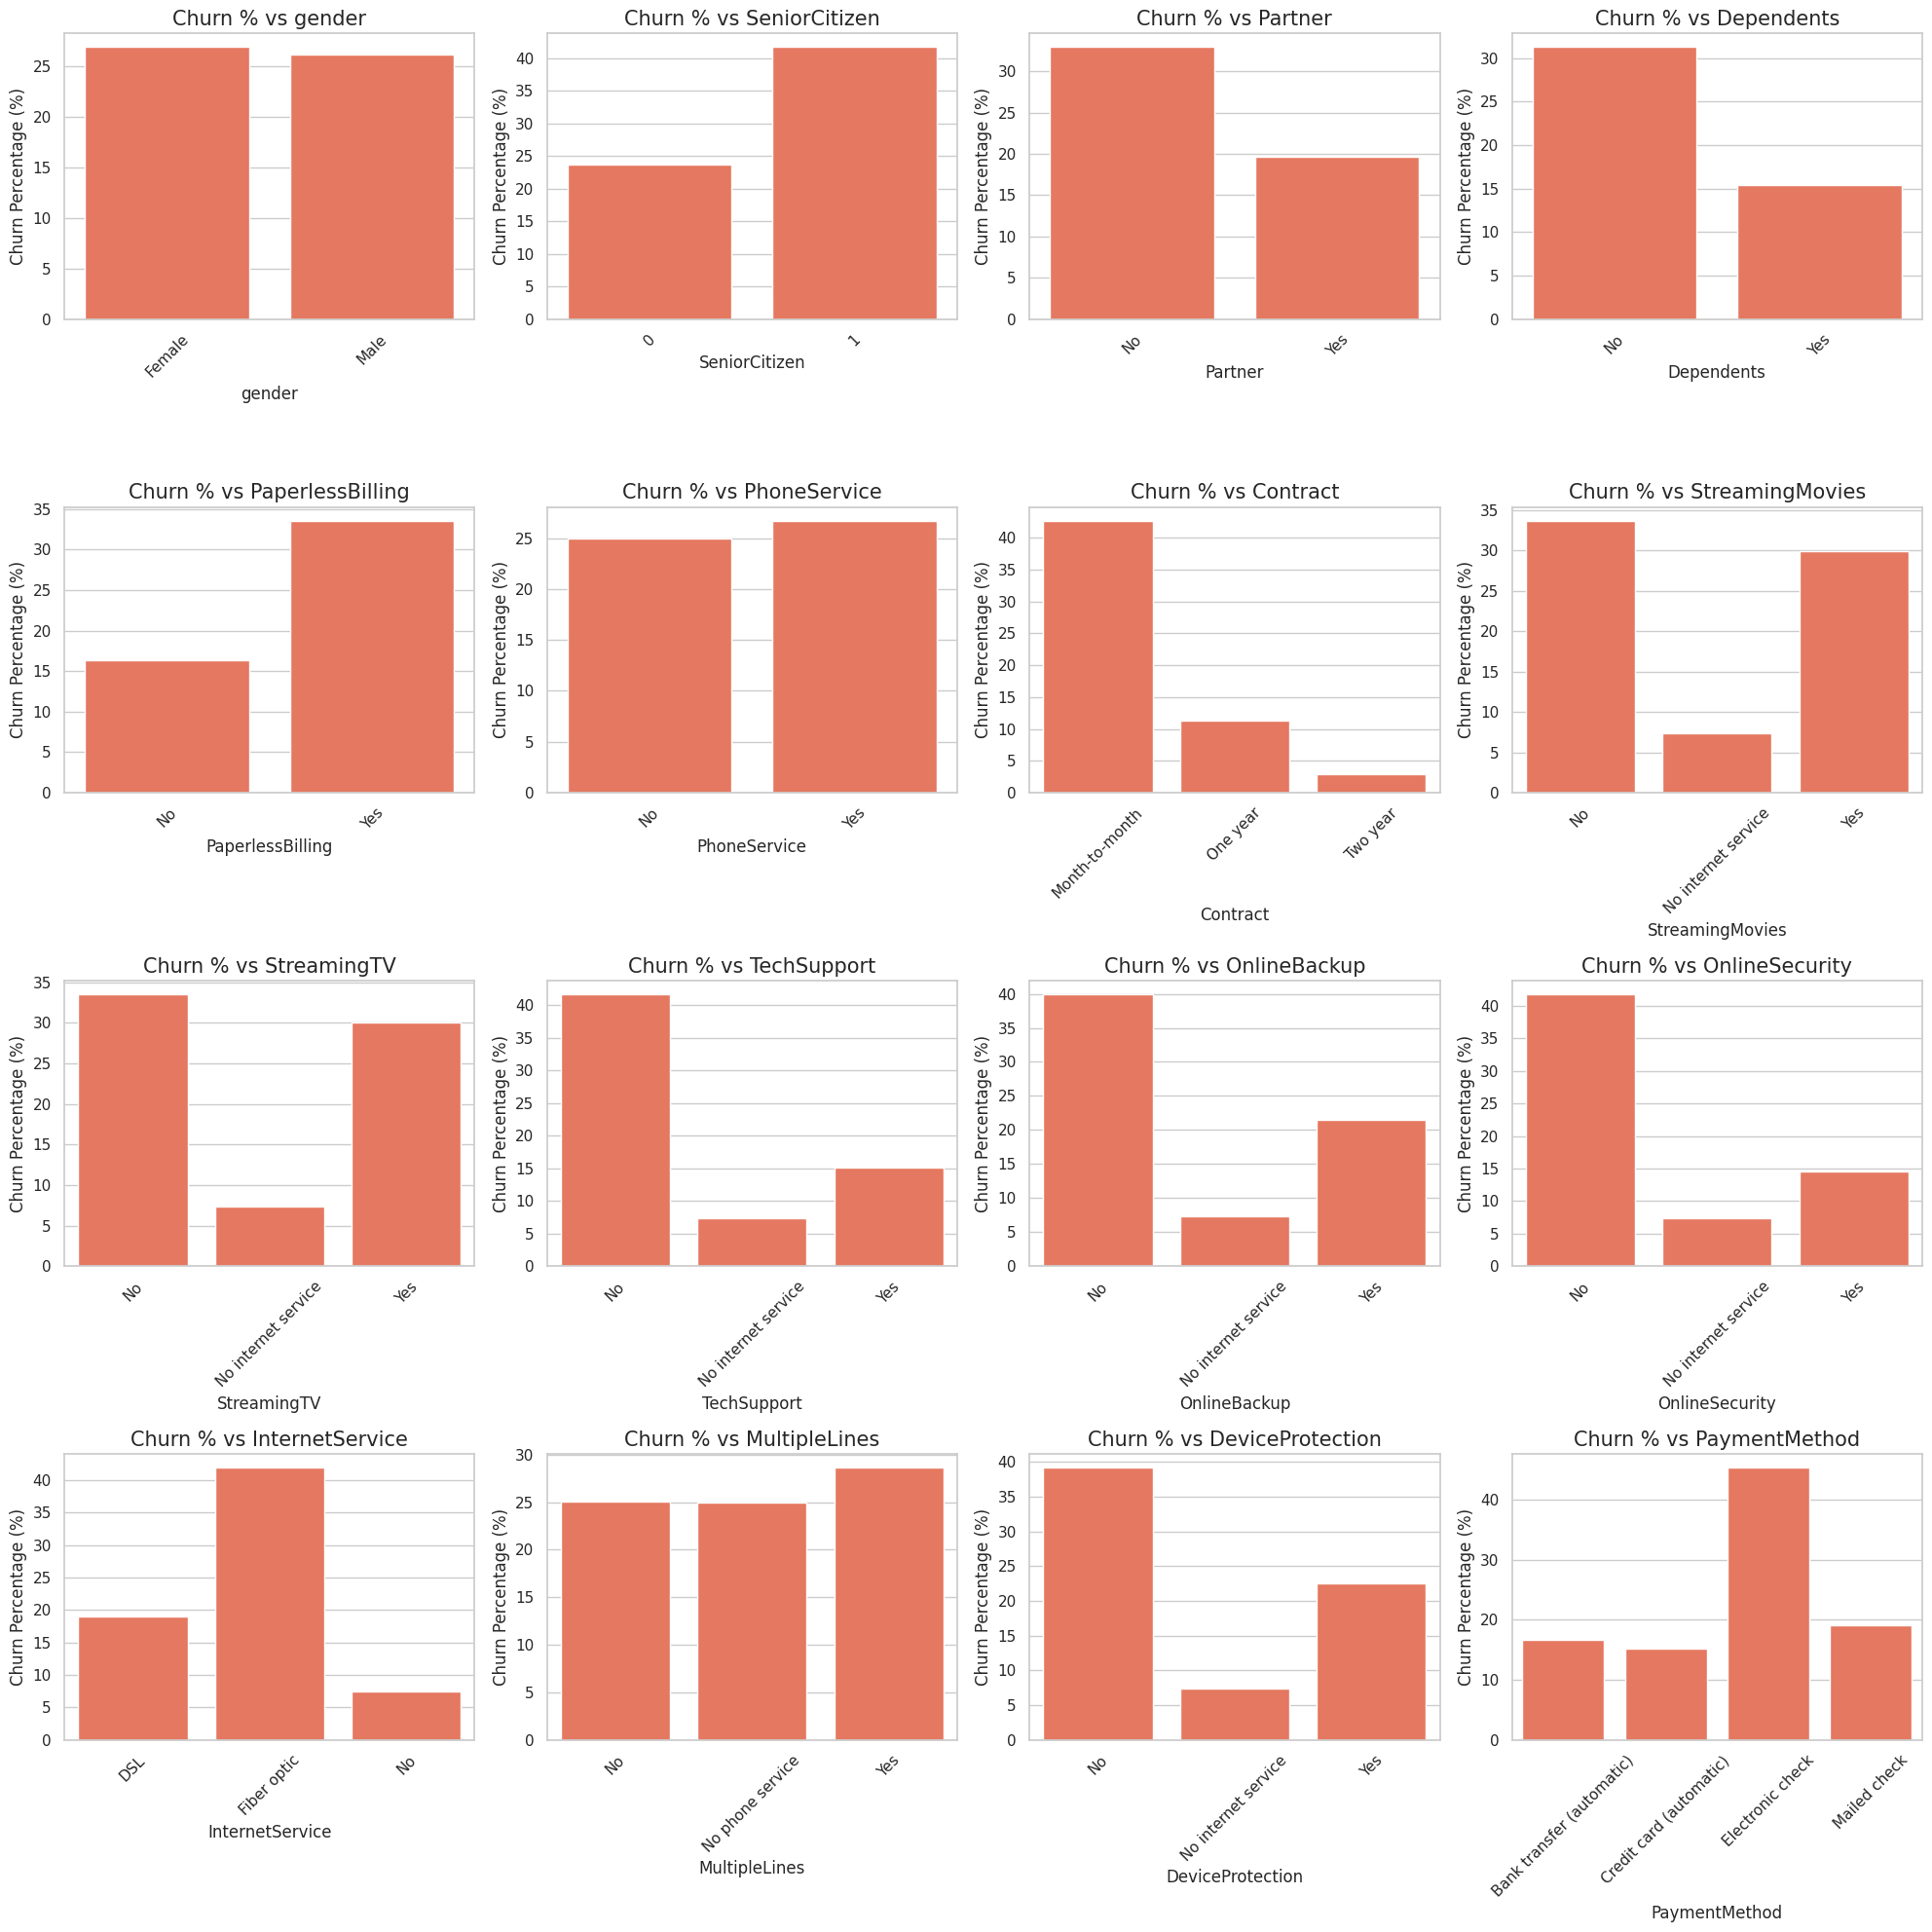

In [15]:
plot_categorical_churn_percentage_grid(df,categorical_columns)


> Several categorical features exhibit strong associations with customer churn. Partner and Dependents show an inverse relationship with churn, where customers without a partner or dependents are more likely to churn compared to those with family ties.

> Churn rates also vary significantly by Internet Service type. Customers using Fiber Optic services exhibit higher churn compared to those on DSL connections.

> Service add-ons play a critical role in retention. Customers without Online Security, Device Protection, or Technical Support demonstrate substantially higher churn, indicating that bundled support services may improve customer stickiness.

> Contract type is one of the strongest predictors of churn. Customers on month-to-month contracts have the highest churn rates, while one-year and two-year contracts show progressively lower churn.

> Billing and payment methods further differentiate churn behavior. Customers enrolled in paperless billing tend to churn more frequently, and Electronic Check payments are associated with the highest churn compared to bank transfer, automatic credit card payments, and mailed checks.


In [16]:
encoded_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'customerID'],
      dtype='object')

## Distribution of Tenure and Charges Across Categorical Features by Churn Status

### Tenure Distribution Across Categorical Features wrt Churn Status

In [17]:
def plot_categorical_churn_percentage_grid(df, cat_cols, num_col):
    colors = ['#6baed6', '#fb6a4a']
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        sns.barplot(
            data=df,
            x=col,
            y=num_col,
            hue='Churn',
            palette=colors,
            estimator='mean',
            ax=axes[i]
        )
        axes[i].set_title(f'Mean Tenure by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Average Tenure')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

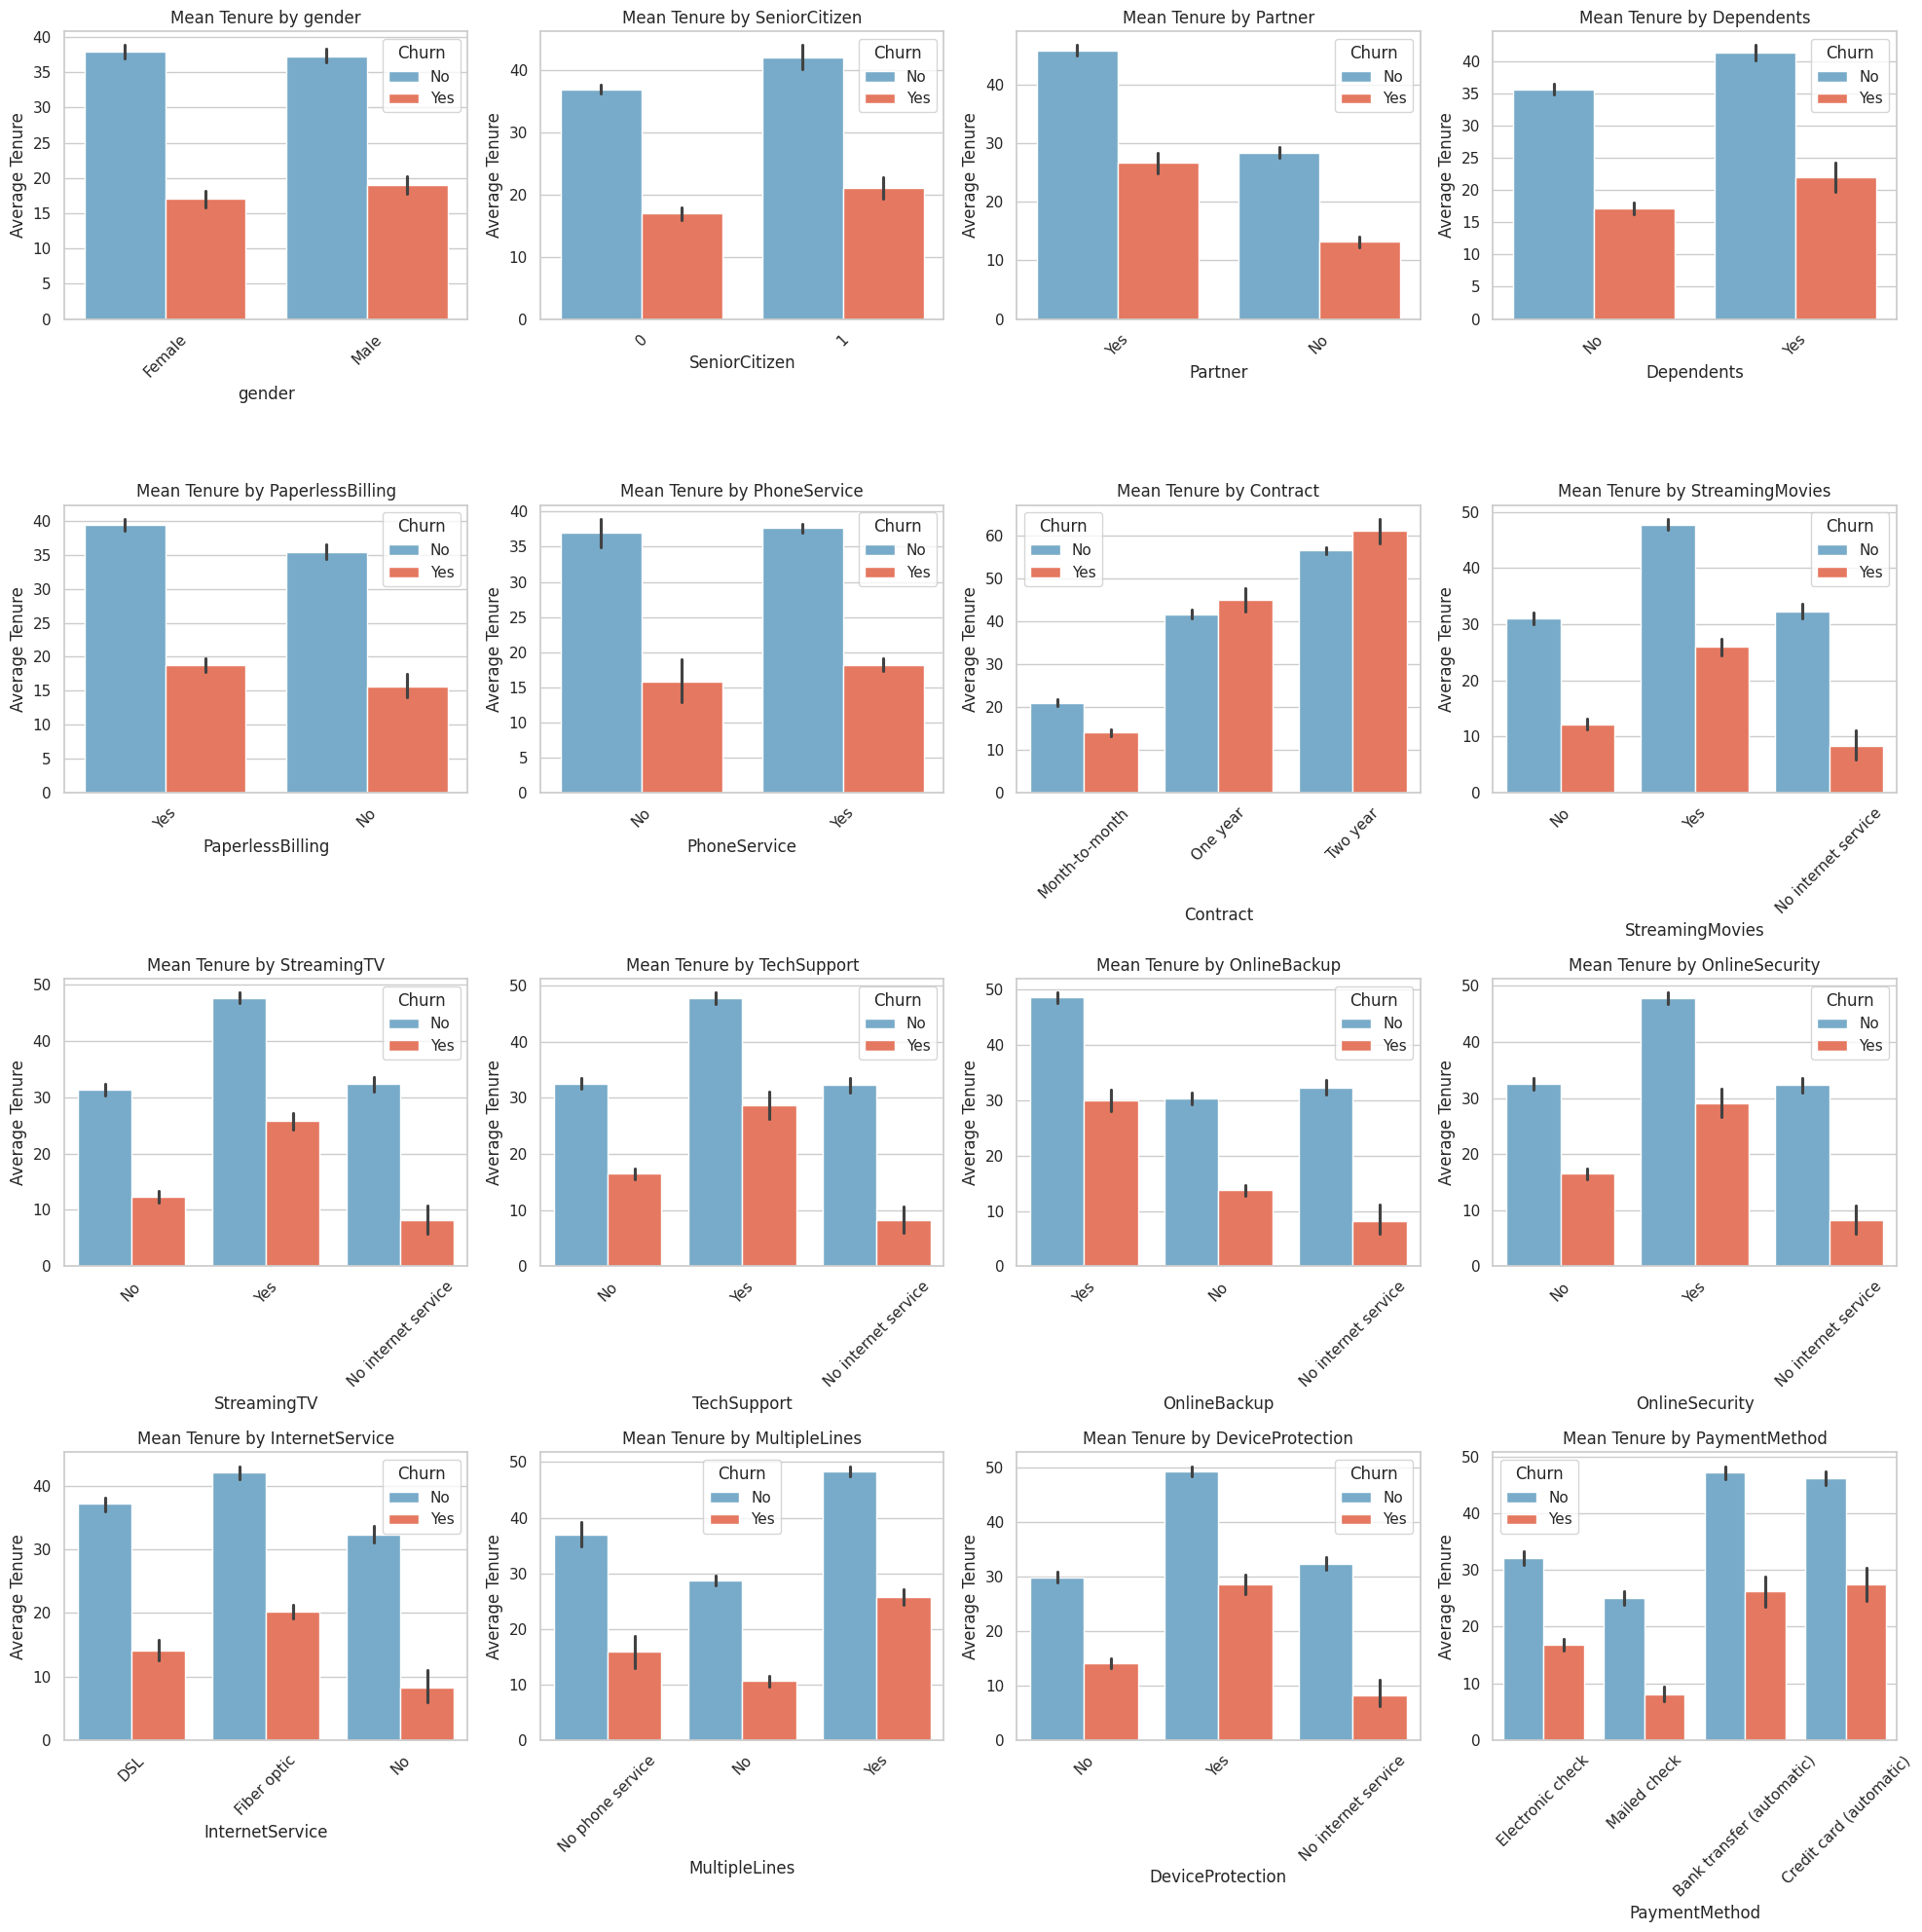

In [18]:
plot_categorical_churn_percentage_grid(df, categorical_columns, 'tenure')

> Analysis of tenure distributions across categorical features reveals several consistent patterns in customer churn behavior.

> Gender shows no meaningful differentiation in churn behavior, as tenure distributions for male and female customers are largely similar.

> For Senior Citizens, churn is concentrated within the first 0–35 months of tenure. The 20–35 month window appears to be a critical decision-making period during which senior customers evaluate whether to continue or discontinue services.

> Customers with a Partner generally demonstrate higher retention, with tenure extending approximately 5–45 months, indicating greater service stability compared to customers without partners.

> The presence of Multiple Lines increases median Monthly Charges, regardless of whether customers churn, suggesting higher service utilization rather than a direct churn driver.

> With respect to Phone Service, tenure distributions are nearly mirrored between customers with and without the service, implying that phone usage alone does not strongly influence churn decisions.

> For Internet Service, customers using Fiber Optic connections exhibit churn concentrated around 30–35 months, suggesting higher scrutiny of service value before deciding to continue or switch providers.

> A similar pattern is observed for Streaming TV and Streaming Movies, where churn is primarily concentrated within the 10–40 month tenure range.

> Service add-ons such as Online Security, Online Backup, Device Protection, and Technical Support show a median churn tenure of approximately 25 months, with upper churn limits extending to 45 months. The 30–35 month period consistently emerges as a key evaluation window for customers deciding whether to retain or switch these services.

> Contract type strongly influences tenure. Customers on one-year contracts typically retain services for up to 25 months, while those on two-year contracts extend to approximately 45 months. However, churn consideration begins around 35 months for one-year contracts and 55 months for two-year contracts, indicating post-contract reassessment behavior.

> Regardless of Paperless Billing adoption, customers begin considering churn as early as the first month, suggesting billing format alone does not significantly delay churn decisions.

> Finally, Payment Method exhibits notable differences in churn tenure. Customers using Bank Transfer (automatic) and Credit Card (automatic) display median churn tenures exceeding 20 months, nearly double that of Electronic Check (≈10 months) and Mailed Check (≈5 months), highlighting the stabilizing effect of automated payment methods.

### MonthlyCharges Distribution Across Categorical Features wrt Churn Status

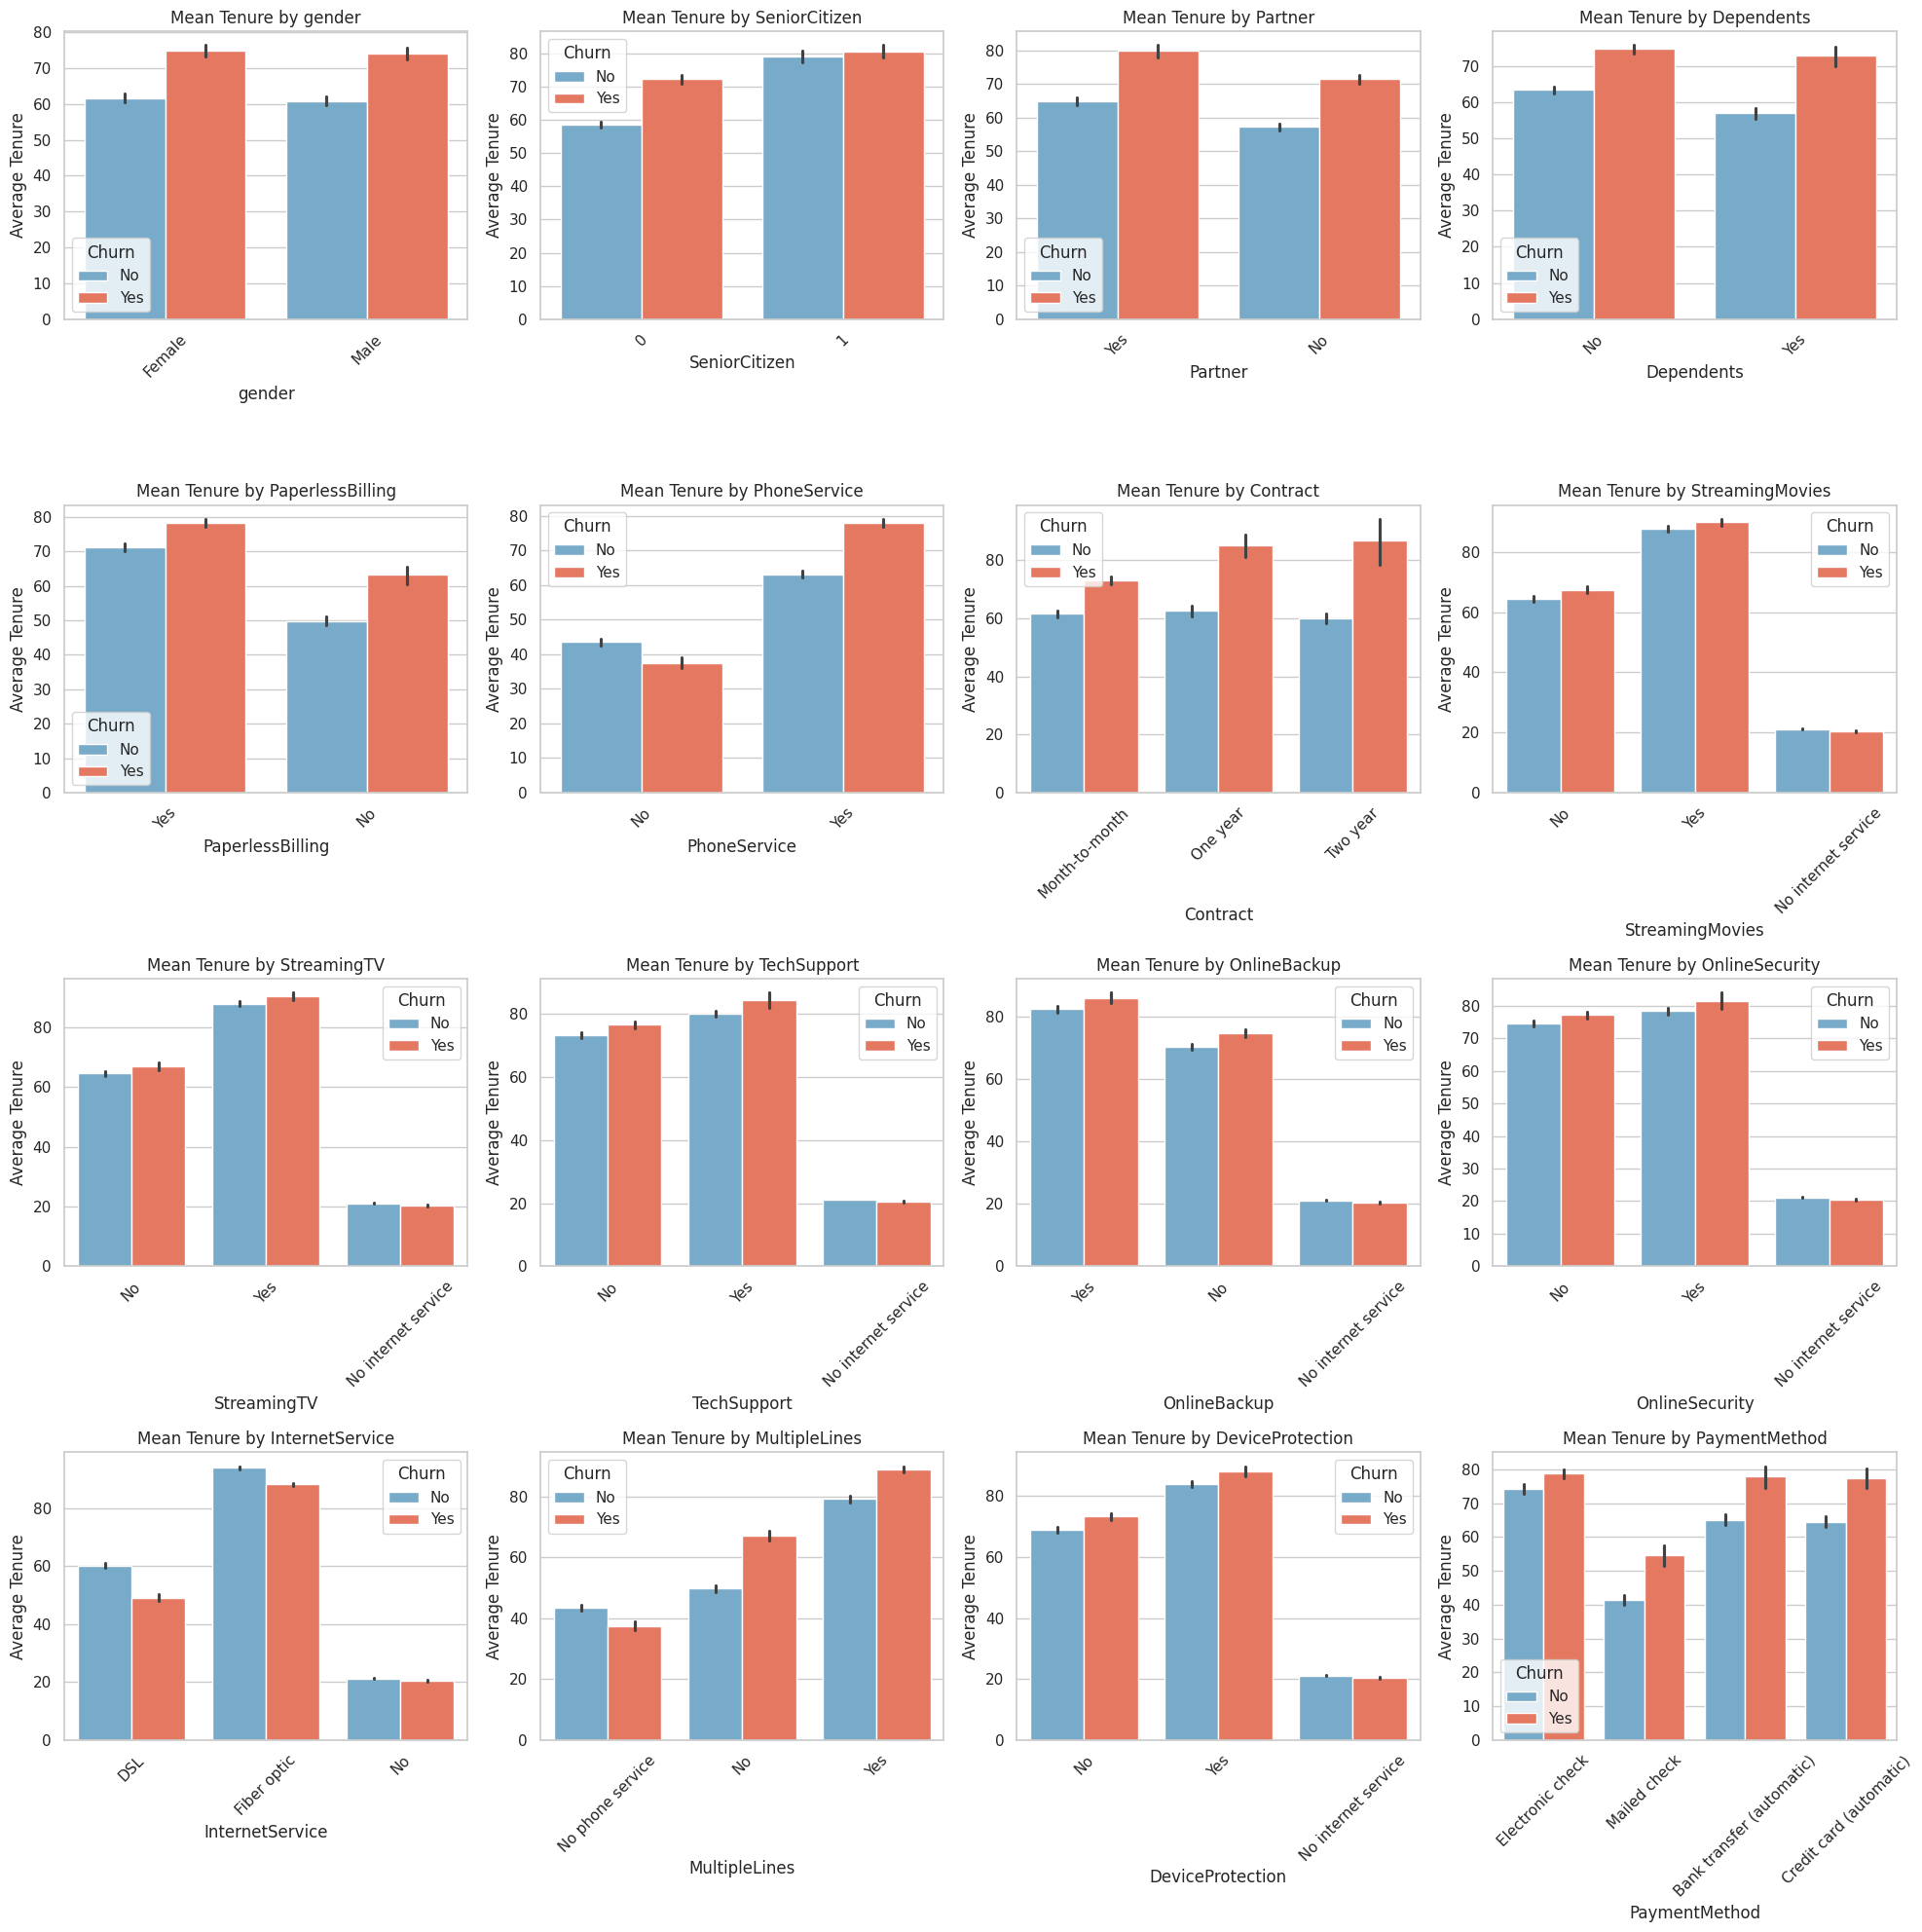

In [19]:
plot_categorical_churn_percentage_grid(df, categorical_columns, 'MonthlyCharges')

> Across most categorical features, the median Monthly Charges of retained customers lie close to the lower bound of churned customers, indicating that higher monthly costs are generally associated with increased churn risk.

> Billing behavior is similar for male and female customers, with comparable median Monthly Charges, while senior citizens show noticeably higher monthly costs, which may contribute to higher churn in this group.

> Customers living with a partner tend to churn at higher Monthly Charge levels compared to customers living alone, suggesting greater price tolerance among partnered households.

> Fiber Optic Internet Service is associated with substantially higher Monthly Charges and correspondingly higher churn. A similar trend is observed for Streaming TV and Streaming Movies, where elevated costs align with increased churn propensity.

> For Phone Service, churn becomes more prominent at the upper end of the Monthly Charge range, indicating sensitivity to higher pricing.

> Customers subscribed to Online Security, Online Backup, Device Protection, and Technical Support exhibit overlapping Monthly Charge distributions between churned and retained groups, suggesting that pricing alone is not the primary churn driver for these services.

> Month-to-month contracts have higher minimum Monthly Charges and show churn at lower price levels than one-year and two-year contracts, highlighting greater price sensitivity.

> Finally, Electronic Check payments are associated with higher Monthly Charges among churned customers, while Mailed Check users exhibit the lowest Monthly Charges across both churned and retained groups.

# Feature Engineering

## Data Scaling

In [22]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

encoded_df['tenure'] = mms.fit_transform(encoded_df[['tenure']])
encoded_df['MonthlyCharges'] = mms.fit_transform(encoded_df[['MonthlyCharges']])
encoded_df['TotalCharges'] = mms.fit_transform(encoded_df[['TotalCharges']])
encoded_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437,0,7590-VHVEG
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564,0,5575-GNVDE
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453,1,3668-QPYBK
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951,0,7795-CFOCW
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462,1,9237-HQITU


## Data Balancing

 The dataset exhibits class imbalance, which can negatively impact model performance. Two common strategies are used to address this issue:

 Undersampling: Reducing the number of samples from the majority class.

 Oversampling: Increasing the number of samples in the minority class to match the majority class.

 After evaluating both approaches, oversampling was selected to preserve information from the majority class while improving minority class representation.

 To perform data balancing, the SMOTE (Synthetic Minority Over-sampling Technique) algorithm from the imbalanced-learn library is chosen to address class imbalance by synthetically generating minority-class samples without discarding existing data.

In [28]:
X = encoded_df.drop(columns=['Churn', 'customerID'])   # features
y = encoded_df['Churn']                  # target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Churn
0    4139
1    1495
Name: count, dtype: int64

After SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


# Modeling

In churn prediction, the goal is to identify customers at risk of leaving, not simply to maximize overall accuracy. Due to class imbalance and business impact, the following metrics are more informative.

Recall (Churn = 1) measures the proportion of actual churned customers correctly identified. High recall is critical because missing a churner results in a lost customer with no opportunity for intervention. In practice, it is often preferable to accept some false positives rather than miss high-risk customers.

ROC–AUC evaluates the model’s ability to distinguish between churned and retained customers across all classification thresholds. A higher ROC–AUC indicates stronger ranking capability and is useful for comparing models independent of a fixed decision threshold.

Precision–Recall Tradeoff reflects the balance between identifying true churners and limiting false positives. The optimal tradeoff depends on business costs, such as the expense of retention actions versus the cost of customer loss.

Accuracy alone is insufficient in churn problems because class imbalance can produce deceptively high accuracy while failing to detect churners. As a result, accuracy does not reliably reflect churn prediction performance.

## Logistic Regression

In [54]:
log_reg = LogisticRegression(
    max_iter=5,
    class_weight='balanced',
    random_state=42
)

log_reg.fit(X_train_smote, y_train_smote)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC_log_reg:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1035
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.78      0.71      0.72      1409

ROC-AUC_log_reg: 0.8044744116355369


## RandomForestClassifier

In [55]:
rf = RandomForestClassifier(
    n_estimators=10,
    max_depth=4,
    min_samples_split=3,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_smote, y_train_smote)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC_RandomForestClassifier:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409

ROC-AUC_RandomForestClassifier: 0.8317368053940943


## XGBClassifier

In [58]:
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_smote, y_train_smote)

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC_xgb:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1035
           1       0.48      0.82      0.60       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.72      0.73      1409

ROC-AUC_xgb: 0.8356984163889535


In [59]:
def plot_confusion_matrices(models, X_test, y_test):
    """
    Plots confusion matrices for multiple models.
    models: dict -> {'Model Name': trained_model}
    """
    n_models = len(models)
    fig, axes = plt.subplots(1, n_models, figsize=(6 * n_models, 5))

    if n_models == 1:
        axes = [axes]

    for ax, (name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            ax=ax
        )

        ax.set_title(f'{name} - Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

    plt.tight_layout()
    plt.show()


In [60]:
def plot_roc_curves(models, X_test, y_test):
    """
    Plots ROC curves for multiple models on the same graph.
    """
    plt.figure(figsize=(17, 6))

    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()


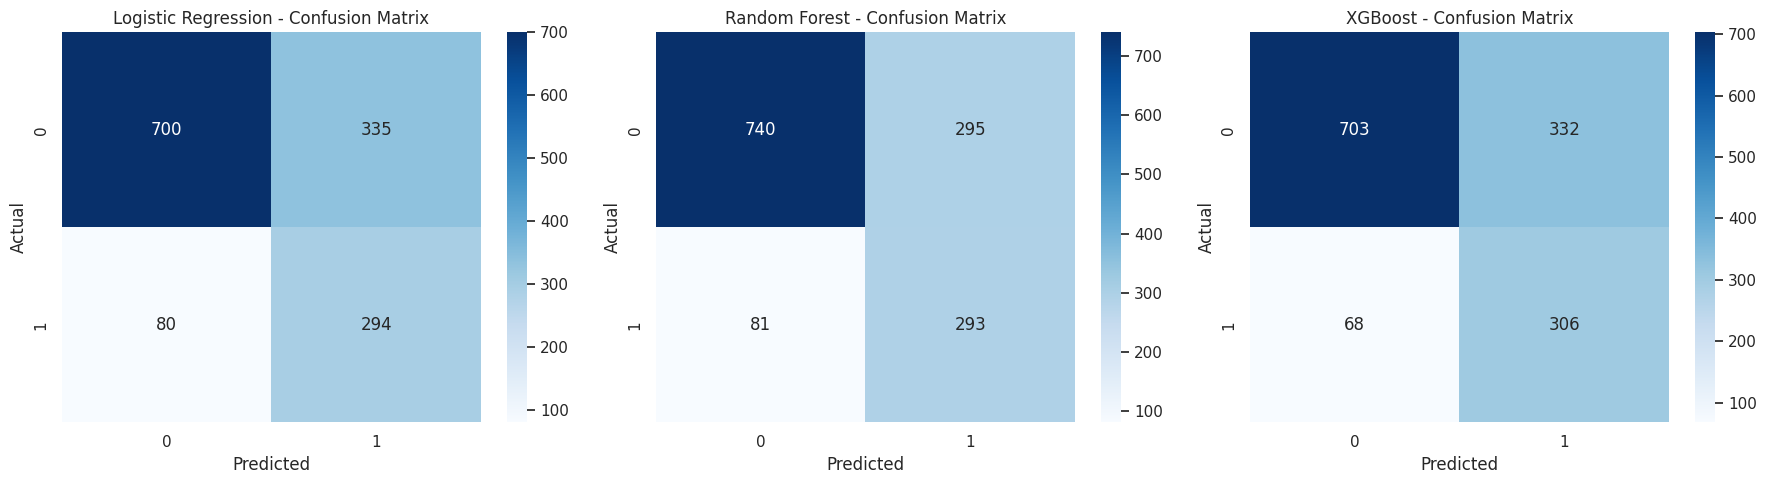

In [61]:
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'XGBoost': xgb
}

plot_confusion_matrices(models, X_test, y_test)


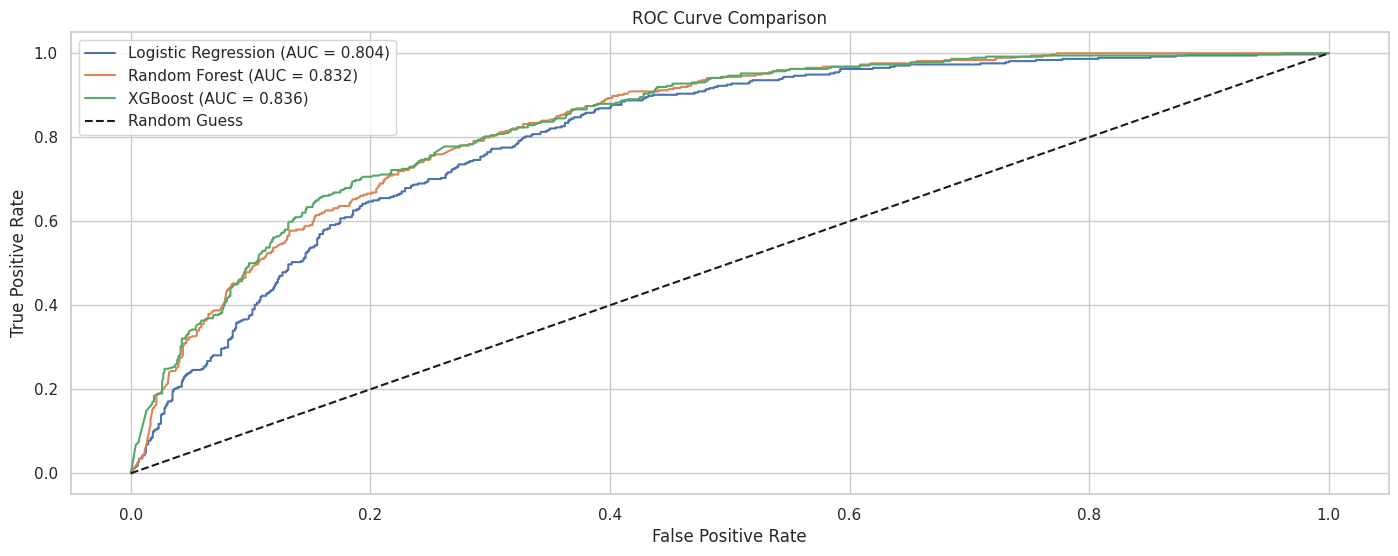

In [62]:
plot_roc_curves(models, X_test, y_test)


## Model Comparison and Business Recommendation

All three models demonstrate strong ability to identify churners, with recall for churned customers (Class 1) close to or above 0.78, which is critical for retention-focused use cases.

Logistic Regression provides a solid baseline with a churn recall of 0.79 and ROC–AUC of 0.80. However, its lower precision for churners results in more false positives, increasing unnecessary retention costs.

Random Forest improves overall performance, achieving a higher ROC–AUC of 0.83 and better balance between precision (0.50) and recall (0.78) for churners. This leads to more efficient targeting of retention efforts with fewer wasted interventions.

XGBoost delivers the highest ROC–AUC (0.84) and the highest churn recall (0.82), indicating the strongest ability to rank high-risk customers correctly. While precision remains comparable to other models, the improved recall ensures fewer churners are missed.

> XGBoost is the preferred model for business deployment, as it maximizes churner detection while providing the best overall ranking performance. This enables earlier and more accurate identification of high-risk customers, supporting targeted retention strategies and improved revenue protection.

# Summary

This analysis identifies key churn drivers and high-impact customer segments that directly influence revenue retention and customer lifetime value (CLV). Three customer segments require focused retention strategies: Senior Citizens, customers living with a partner, and customers living alone.

Although Senior Citizens represent a smaller customer base, they exhibit higher baseline Monthly Charges, indicating strong revenue potential when service quality meets expectations. Customers living with partners or alone are more price-sensitive, with higher churn observed once Monthly Charges exceed approximately 65, highlighting the importance of disciplined pricing for these segments.

The first six months of customer tenure emerge as the most critical period for churn prevention. Investment in Online Security, Online Backup, Device Protection, and Technical Support during this phase significantly improves early retention, strengthening long-term CLV and reducing acquisition cost waste.

High-revenue services such as Fiber Optic Internet and Multiple Lines drive ARPU growth but face adoption challenges due to high entry pricing. Strategic service bundling can increase average revenue per user while minimizing churn by discouraging low-value plan combinations and promoting balanced, value-oriented offerings.

Billing and payment mechanisms also materially affect churn. Electronic Check payments are strongly associated with higher churn and should be deprioritized in favor of automatic bank transfer and credit card payments, which support longer customer retention and more predictable revenue streams.

From a predictive analytics perspective, XGBoost delivered the strongest churn detection performance, maximizing recall of high-risk customers and enabling earlier intervention. This directly supports revenue protection by prioritizing retention actions toward customers most likely to churn.



## Business Impact

Improved retention in early tenure → higher CLV and lower acquisition costs

Optimized pricing and bundling → increased ARPU with controlled churn

Targeted churn prediction → more efficient retention spend and reduced revenue leakage